# Weather Prediction

## Import library

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import math

## Data Exploration

In [36]:
df = pd.read_csv('testset.csv')

In [37]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [39]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [40]:
df.shape

(100990, 20)

In [41]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [42]:
df.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [43]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

## Handling Missing Values

In [44]:
mean_dewptm = round(df[' _dewptm'].mean(),2)
df[' _dewptm'] = df[' _dewptm'].fillna(mean_dewptm)
mean_dewptm

15.74

In [45]:
mean_heatindexm = round(df[' _heatindexm'].mean(),2)
df[' _heatindexm'] = df[' _heatindexm'].fillna(mean_heatindexm)
mean_heatindexm

35.65

In [46]:
mean_hum = round(df[' _hum'].mean(),2)
df[' _hum'] = df[' _hum'].fillna(mean_hum)
mean_hum

57.91

In [47]:
mean_tempm = round(df[' _tempm'].mean(),2)
df[' _tempm'] = df[' _tempm'].fillna(mean_tempm)
mean_tempm

25.45

In [48]:
mean_pressurem= round(df[' _pressurem'].mean(),2)
df[' _pressurem'] = df[' _pressurem'].fillna(mean_pressurem)
mean_pressurem

1932.33

In [49]:
mean_precipm = df[' _precipm'].mean()
mean_precipm

nan

In [50]:
df = df.drop([' _precipm'],axis='columns')

In [51]:
mean_vism = round(df[' _vism'].mean(),2)
df[' _vism'] = df[' _vism'].fillna(mean_vism )
mean_vism

2.4

In [52]:
mean_wdird = round(df[' _wdird'].mean(),2)
df[' _wdird'] = df[' _wdird'].fillna(mean_wdird)
mean_wdird

163.55

In [53]:
mean_wgustm = round(df[' _wgustm'].mean(),2)
df[' _wgustm'] = df[' _wgustm'].fillna(mean_wgustm)
mean_wgustm

37.67

In [54]:
mean_windchillm = round(df[' _windchillm'].mean(),2)
df[' _windchillm'] = df[' _windchillm'].fillna(mean_windchillm)
mean_windchillm

5.71

In [55]:
mean_wspdm = round(df[' _wspdm'].mean(),2)
df[' _wspdm'] = df[' _wspdm'].fillna(mean_wspdm)
mean_wspdm

7.68

In [56]:
most_freq = df[' _conds'].value_counts().idxmax()
df[' _conds'] = df[' _conds'].fillna(most_freq)
most_freq

'Haze'

In [57]:
most_freq = df[' _wdire'].value_counts().idxmax()
df[' _wdire'] = df[' _wdire'].fillna(most_freq)
most_freq

'North'

In [58]:
df.isnull().sum()

datetime_utc    0
 _conds         0
 _dewptm        0
 _fog           0
 _hail          0
 _heatindexm    0
 _hum           0
 _pressurem     0
 _rain          0
 _snow          0
 _tempm         0
 _thunder       0
 _tornado       0
 _vism          0
 _wdird         0
 _wdire         0
 _wgustm        0
 _windchillm    0
 _wspdm         0
dtype: int64

In [59]:
def extract_year(value):
    return (value[0:4])
def extract_month(value):
    return (value[4:6])
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

## Data Analysis

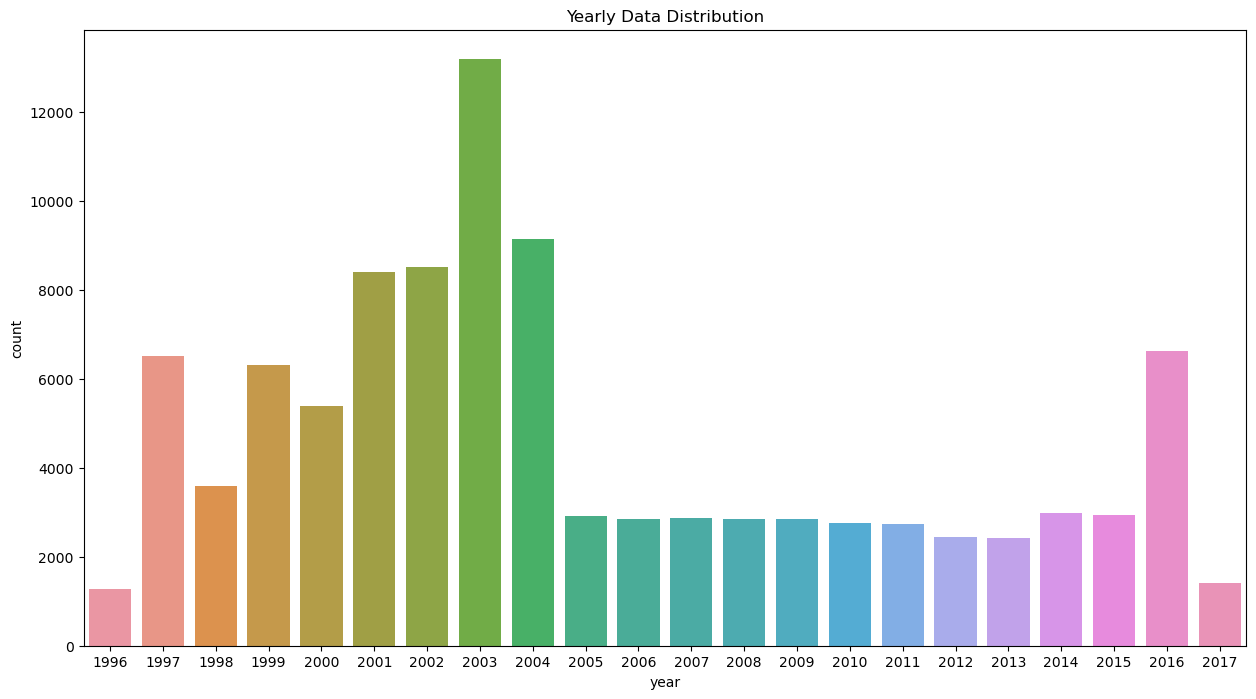

In [60]:
plt.figure(figsize=(15,8))
sns.countplot(x='year',data=df)
plt.title('Yearly Data Distribution')
plt.show()

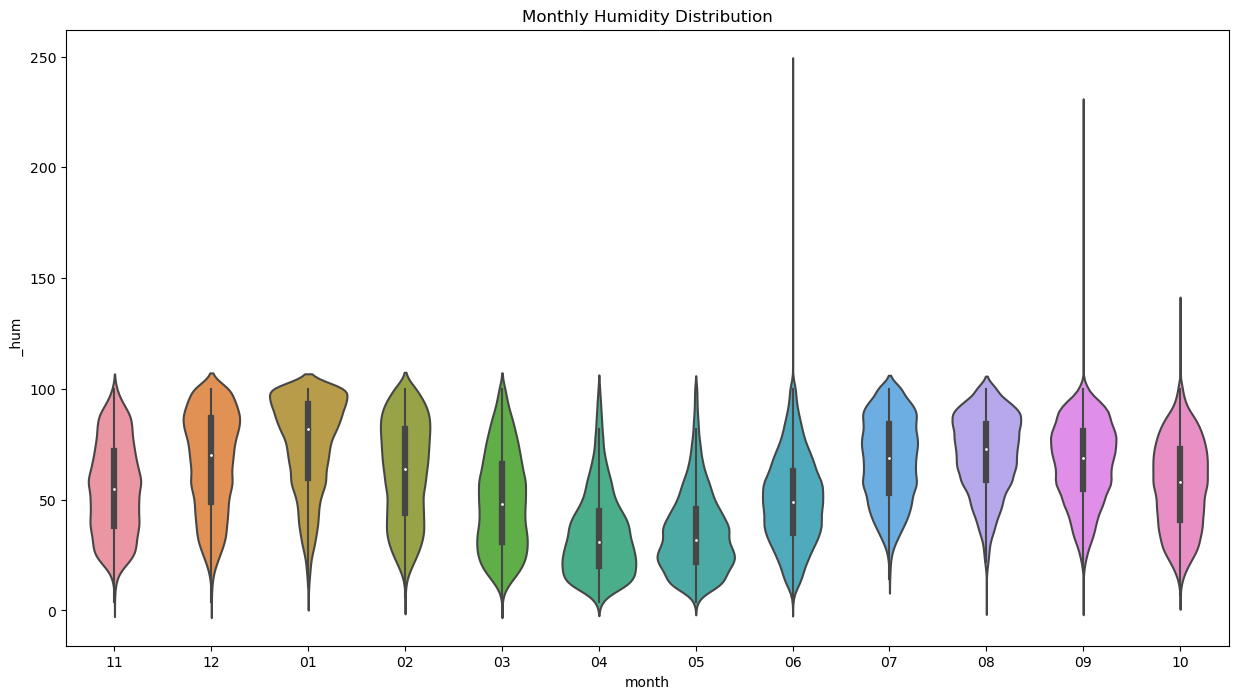

In [61]:
plt.figure(figsize=(15,8))
sns.violinplot(x="month",y=" _hum",data=df)
plt.title('Monthly Humidity Distribution')
plt.show()

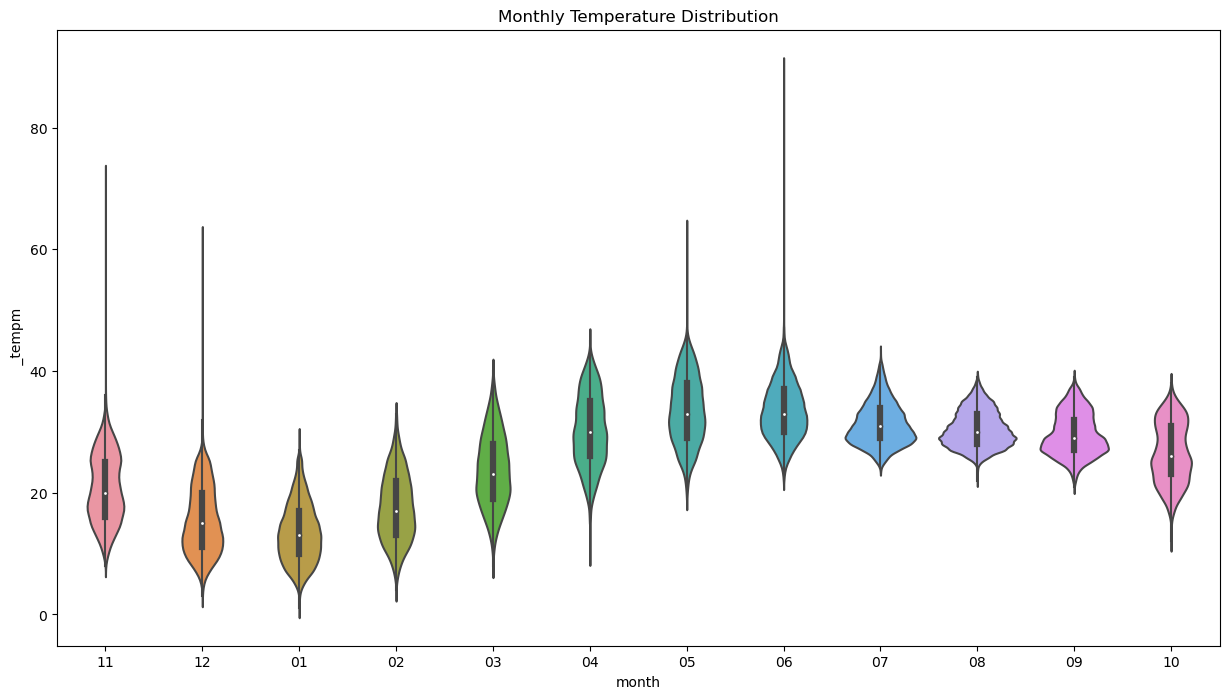

In [62]:
plt.figure(figsize=(15,8))
sns.violinplot(x="month",y=" _tempm",data=df)
plt.title('Monthly Temperature Distribution')
plt.show()

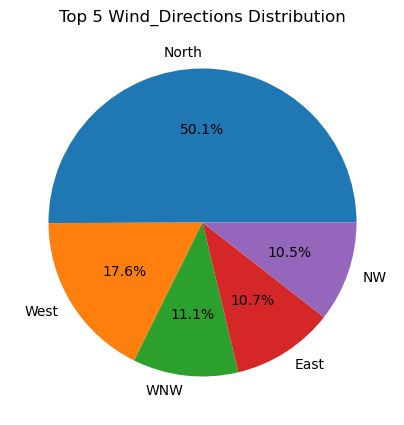

In [63]:
plt.figure(figsize=(5,5))
wind_dir_counts = df[' _wdire'].value_counts()
top_5_wind_dir_counts = wind_dir_counts.head(5)
plt.pie(top_5_wind_dir_counts.values, labels=top_5_wind_dir_counts.index, autopct='%1.1f%%')
plt.title('Top 5 Wind_Directions Distribution')
plt.show()

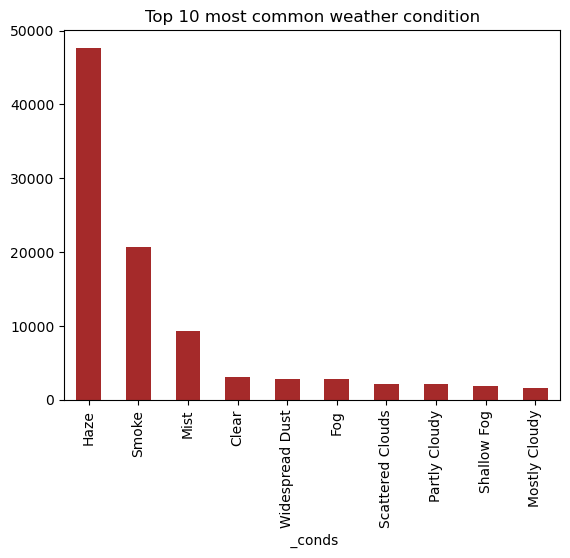

In [64]:
df[' _conds'].value_counts().head(10).plot(kind='bar',color='brown')
plt.title("Top 10 most common weather condition")
plt.show()

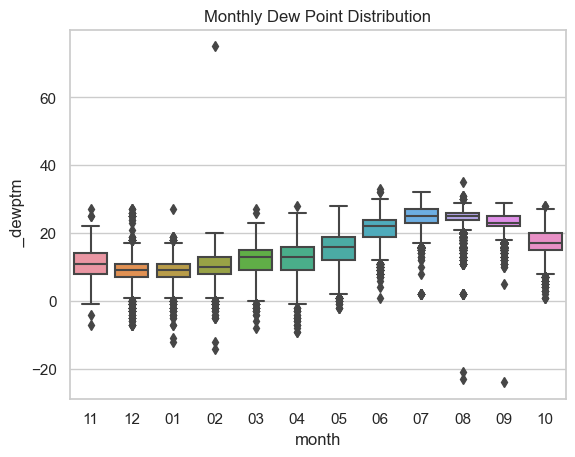

In [65]:
sns.set(style="whitegrid")
sns.boxplot(x='month',y=' _dewptm',data=df)
plt.title('Monthly Dew Point Distribution')
plt.show()

C:\Users\SOUMYADEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUMYADEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


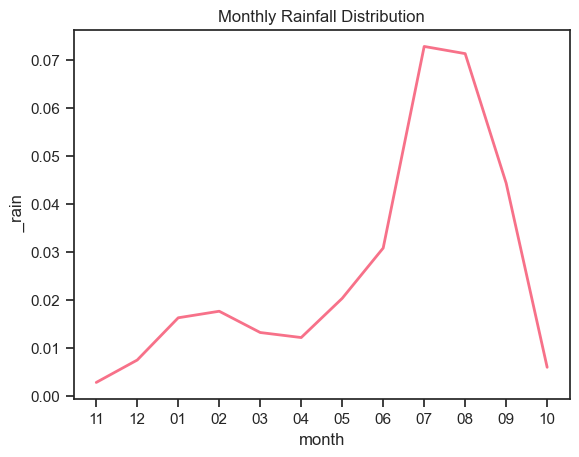

In [66]:
sns.set(style="ticks")     
sns.set_palette("husl")
sns.lineplot(x='month',y=' _rain',data=df,linewidth=2, errorbar=None)
plt.title('Monthly Rainfall Distribution')
plt.show()

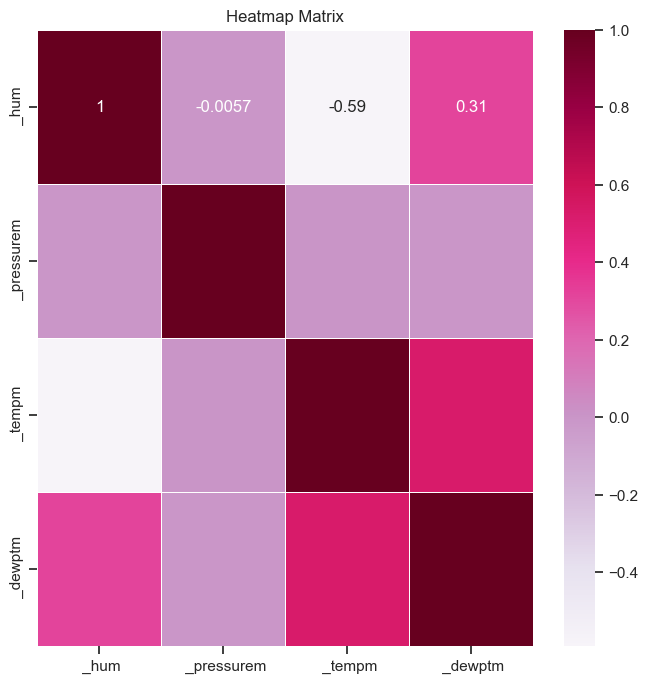

In [67]:
numerical_columns = [' _hum', ' _pressurem', ' _tempm',' _dewptm']
matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True, cmap='PuRd', linewidths=0.5)
plt.title('Heatmap Matrix')
plt.show()

## Building the Machine Learning Model

In [68]:
dummy = pd.get_dummies(df[' _wdire'])
dummy

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
100986,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
100987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
100988,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [69]:
le = LabelEncoder()

In [70]:
merge = pd.concat([dummy,df],axis='columns')
final = merge.drop([' _wdire','datetime_utc'],axis='columns')
final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month
0,False,False,False,False,False,False,False,False,False,False,...,30.0,0,0,5.0,280.0,37.67,5.71,7.40,1996,11
1,False,False,False,False,False,False,False,True,False,False,...,28.0,0,0,2.4,0.0,37.67,5.71,7.68,1996,11
2,False,False,False,False,False,False,False,True,False,False,...,24.0,0,0,2.4,0.0,37.67,5.71,7.68,1996,11
3,False,False,False,False,False,False,False,True,False,False,...,24.0,0,0,2.0,0.0,37.67,5.71,7.68,1996,11
4,False,False,False,False,False,False,False,True,False,False,...,23.0,0,0,1.2,0.0,37.67,5.71,0.00,1996,11


In [71]:
final[' _conds_n']=le.fit_transform(final[' _conds'])
final = final.drop([' _conds'],axis ='columns')
final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm,year,month,_conds_n
0,False,False,False,False,False,False,False,False,False,False,...,0,0,5.0,280.0,37.67,5.71,7.40,1996,11,31
1,False,False,False,False,False,False,False,True,False,False,...,0,0,2.4,0.0,37.67,5.71,7.68,1996,11,31
2,False,False,False,False,False,False,False,True,False,False,...,0,0,2.4,0.0,37.67,5.71,7.68,1996,11,31
3,False,False,False,False,False,False,False,True,False,False,...,0,0,2.0,0.0,37.67,5.71,7.68,1996,11,31
4,False,False,False,False,False,False,False,True,False,False,...,0,0,1.2,0.0,37.67,5.71,0.00,1996,11,31


In [72]:
X = final.drop([' _conds_n'],axis='columns')
X.shape

(100990, 35)

In [73]:
y=final[' _conds_n']
y.shape

(100990,)

In [74]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [75]:
scaler = MinMaxScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
x_test = scaler.transform(x_test)

In [78]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = SVC(kernel='linear', probability=True, random_state=42)

In [79]:
model2.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [80]:
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
pred1 = model1.predict(x_test)

In [82]:
pred2 = model2.predict(x_test)

In [83]:
acc1 = accuracy_score(y_test, pred1)
print("Random Forest Accuracy:", acc1)

Random Forest Accuracy: 0.8243390434696505


In [84]:
acc2 = accuracy_score(y_test, pred2)
print("SVM Accuracy:", acc2)

SVM Accuracy: 0.690167343301317
